In [1]:
from kudu_metrics_log import *
import glob
import numpy
import os
from matplotlib import pyplot as plt

In [2]:
EXPS_HOME = "/home/ec2-user/kudu-experiments"

In [3]:
def metrics_for_workload(workload, cluster="**"):
    clusters_glob = glob.glob("{}/logs/{}/**".format(EXPS_HOME, workload))
    tserver_to_metrics = {}
    for cluster_dir in clusters_glob:
        tservers_glob = glob.glob("{}/tservers/**".format(cluster_dir))
        for tserver_dir in tservers_glob:
            tserver_to_metrics["{}:{}".format(os.path.basename(cluster_dir), os.path.basename(tserver_dir))] = \
                                              glob.glob("{}/**".format(tserver_dir))
    return tserver_to_metrics

In [4]:
# ("sequential_auto-2018-05-23_1805", "ec2-efs")

In [9]:
workload = "range-2018-06-03_1704"
tserver_to_metric_files = metrics_for_workload(workload)
tserver_to_parser = {}
need_print = True
for ts, files in tserver_to_metric_files.iteritems():
    tserver_to_parser[ts] = MetricsLogParser(files)
    if need_print:
        for c in tserver_to_parser[ts].column_names():
            print c
        print "------"
        need_print = False
    print "Tserver: {}".format(ts)

time
mrs_size
mem_rejections_per_sec
log_bytes_w_per_sec
bm_bytes_w_per_sec
inserts_per_sec
bloom_lookups_p50
bloom_lookups_p95
bloom_lookups_p99
bloom_lookups_p999
rpc_queue_time_p50
rpc_queue_time_p95
rpc_queue_time_p99
rpc_queue_time_p999
write_latency_us_p50
write_latency_us_p95
write_latency_us_p99
write_latency_us_p999
prepare_queue_length_p50
prepare_queue_length_p95
prepare_queue_length_p99
prepare_queue_length_p999
log_append_us_p50
log_append_us_p95
log_append_us_p99
log_append_us_p999
apply_queue_length_p50
apply_queue_length_p95
apply_queue_length_p99
apply_queue_length_p999
apply_queue_time_us_p50
apply_queue_time_us_p95
apply_queue_time_us_p99
apply_queue_time_us_p999
apply_run_time_us_p50
apply_run_time_us_p95
apply_run_time_us_p99
apply_run_time_us_p999
------
Tserver: ec2-efs-general:54.200.86.157
Tserver: ec2-efs-general:34.219.187.199
Tserver: ec2-efs-perf:54.200.86.157
Tserver: ec2-ephemeral:34.219.187.199
Tserver: ec2-efs-perf:34.219.187.199
Tserver: ec2-efs-perf:5

In [10]:
tserver_to_metrics = {}
for tserver, p in tserver_to_parser.iteritems():
    tserver_to_metrics[tserver] = \
        numpy.array(list(p), dtype=[(colname, float) for colname in p.column_names()])

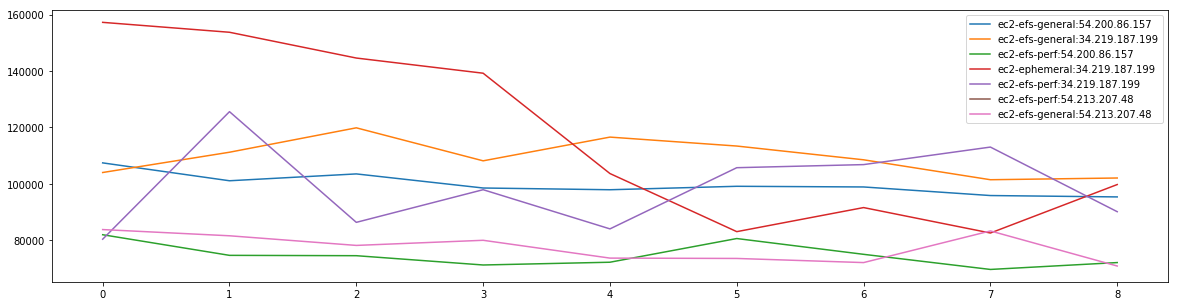

In [11]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)
metric_name = "inserts_per_sec"

for tserver, metrics in tserver_to_metrics.iteritems():
    ax.plot(metrics[metric_name])
    
ax.legend([c for c in tserver_to_metrics])
plt.show()